In [ ]:
# import the necessary packages
from keras import backend as K
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.datasets import mnist
from keras.utils import np_utils
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
import numpy as np

import matplotlib.pyplot as plt

np.random.seed(1671)  # for reproducibility

In [ ]:

#define the convnet
class LeNet:
	@staticmethod
	def build(input_shape, classes):
		model = Sequential()
		# CONV => RELU => POOL
		model.add(Conv2D(20, kernel_size=5, padding="same",
			input_shape=input_shape))
		model.add(Activation("relu"))
		model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
		# CONV => RELU => POOL
		model.add(Conv2D(50, kernel_size=5, padding="same"))
		model.add(Activation("relu"))
		model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
		# Flatten => RELU layers
		model.add(Flatten())
		model.add(Dense(500))
		model.add(Activation("relu"))

		# a softmax classifier
		model.add(Dense(classes))
		model.add(Activation("softmax"))

		return model


In [ ]:
# network and training
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = Adam()
VALIDATION_SPLIT=0.2


In [ ]:
IMG_ROWS, IMG_COLS = 28, 28 # input image dimensions
NB_CLASSES = 10  # number of outputs = number of digits
INPUT_SHAPE = (1, IMG_ROWS, IMG_COLS)

# data: shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
K.set_image_data_format('channels_first')

# consider them as float and normalize
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# we need a 60K x [1 x 28 x 28] shape as input to the CONVNET
X_train = X_train[:, np.newaxis, :, :]
X_test = X_test[:, np.newaxis, :, :]

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, NB_CLASSES)
y_test = np_utils.to_categorical(y_test, NB_CLASSES)


60000 train samples
10000 test samples


In [ ]:
# initialize the optimizer and model
model = LeNet.build(input_shape=INPUT_SHAPE, classes=NB_CLASSES)
model.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER,metrics=["accuracy"])

history = model.fit(X_train, y_train,batch_size=BATCH_SIZE, epochs=NB_EPOCH,verbose=VERBOSE ,validation_split=VALIDATION_SPLIT )



Epoch 1/20
375/375 [==============================] - 12s 23ms/step - loss: 0.1788 - accuracy: 0.9460 - val_loss: 0.0595 - val_accuracy: 0.9818
Epoch 2/20
375/375 [==============================] - 6s 17ms/step - loss: 0.0486 - accuracy: 0.9849 - val_loss: 0.0416 - val_accuracy: 0.9879
Epoch 3/20
375/375 [==============================] - 6s 16ms/step - loss: 0.0308 - accuracy: 0.9903 - val_loss: 0.0379 - val_accuracy: 0.9880
Epoch 4/20
375/375 [==============================] - 6s 16ms/step - loss: 0.0235 - accuracy: 0.9922 - val_loss: 0.0406 - val_accuracy: 0.9877
Epoch 5/20
375/375 [==============================] - 6s 16ms/step - loss: 0.0166 - accuracy: 0.9949 - val_loss: 0.0297 - val_accuracy: 0.9915
Epoch 6/20
375/375 [==============================] - 6s 16ms/step - loss: 0.0133 - accuracy: 0.9955 - val_loss: 0.0427 - val_accuracy: 0.9888
Epoch 7/20
375/375 [==============================] - 6s 16ms/step - loss: 0.0108 - accuracy: 0.9962 - val_loss: 0.0300 - val_accuracy: 0.991

In [ ]:
score = model.evaluate(X_test, y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 2s 5ms/step - loss: 0.0479 - accuracy: 0.9893

Test score: 0.047932218760252
Test accuracy: 0.989300012588501


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


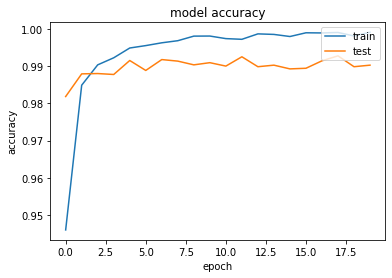

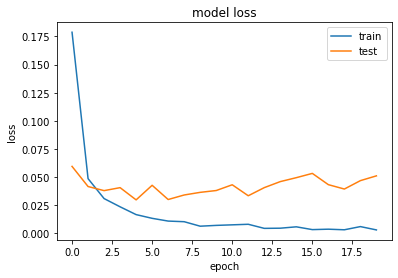

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()